<a href="https://colab.research.google.com/github/miltondsantos/TimeSeries_EconomicIndex/blob/main/df_sc_ano_mes_fob_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/Data')

Mounted at /content/Data


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/Data/MyDrive/Colab/EXP_COMPLETA.csv', sep=';')
df.head()

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB
0,1997,11,74122000,10,249,SP,4,817600,0,0,3
1,1997,11,73082000,10,97,MG,7,130151,0,4292,6442
2,1997,11,84248119,11,196,SP,1,817800,32,3468,31510
3,1997,11,48239090,10,586,MN,9,910600,0,0,1
4,1997,11,72112910,10,850,SP,1,817800,118,117505,103866


In [4]:
# Filtro com o método query
df_sc = df

In [8]:
df_sc.head()

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB
0,1997,11,74122000,10,249,SP,4,817600,0,0,3
1,1997,11,73082000,10,97,MG,7,130151,0,4292,6442
2,1997,11,84248119,11,196,SP,1,817800,32,3468,31510
3,1997,11,48239090,10,586,MN,9,910600,0,0,1
4,1997,11,72112910,10,850,SP,1,817800,118,117505,103866


In [13]:
df_sc.query('SG_UF_NCM == "SC" and CO_NCM == 21069090', inplace = True)

In [15]:
df_sc_ncm = df_sc
df_sc_ncm

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB
15,1997,11,21069090,10,845,SC,9,1011051,0,278,583
1379,1997,6,21069090,10,845,SC,9,1011000,0,12,26
2898,1997,3,21069090,10,845,SC,7,1011051,0,144,1070
43003,1997,5,21069090,10,158,SC,7,1010900,0,4600,37490
46197,1997,4,21069090,10,399,SC,1,920251,0,1080,1740
...,...,...,...,...,...,...,...,...,...,...,...
26755622,2023,2,21069090,10,77,SC,1,927502,12,12,41
26763415,2023,7,21069090,10,580,SC,1,927502,8,8,100
26773910,2023,5,21069090,10,77,SC,1,927700,11,11,72
26776776,2023,2,21069090,10,196,SC,1,817800,1032,1032,12797


In [16]:
df_sc_ano_mes = df_sc_ncm
df_sc_ano_mes = df_sc_ncm.loc[:,'CO_ANO':'CO_MES']
df_sc_ano_mes

,CO_ANO,CO_MES
15,1997,11
1379,1997,6
2898,1997,3
43003,1997,5
46197,1997,4
...,...,...
26755622,2023,2
26763415,2023,7
26773910,2023,5
26776776,2023,2


In [19]:
df_sc_fob = df_sc_ncm
df_sc_fob = df_sc_ncm.loc[:, 'VL_FOB']
df_sc_fob

15            583
1379           26
2898         1070
43003       37490
46197        1740
            ...  
26755622       41
26763415      100
26773910       72
26776776    12797
26778693       89
Name: VL_FOB, Length: 3106, dtype: int64

In [21]:
result = pd.concat([df_sc_ano_mes, df_sc_fob], axis=1)
result

,CO_ANO,CO_MES,VL_FOB
15,1997,11,583
1379,1997,6,26
2898,1997,3,1070
43003,1997,5,37490
46197,1997,4,1740
...,...,...,...
26755622,2023,2,41
26763415,2023,7,100
26773910,2023,5,72
26776776,2023,2,12797


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(result, *['CO_ANO'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(result, *['CO_MES'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(result, *['VL_FOB'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(result, *['CO_ANO'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(result, *['CO_MES'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(result, *['VL_FOB'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(result, *[[['CO_ANO', 'CO_MES'], ['CO_MES', 'VL_FOB']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(result, *['CO_ANO', 'CO_MES', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(result, *['CO_ANO', 'VL_FOB', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(result, *['CO_ANO', 'count()', None], **{})
chart

In [22]:
result.to_csv("/content/Data/MyDrive/Colab/df_sc_ano_mes_fob_v1.csv")

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [12]:
df = pd.read_csv('/content/Data/MyDrive/Colab/df_sc_ano_mes_fob_v1.csv')
df.head()

,ds,y
0,1997-11-01,583
1,1997-06-01,26
2,1997-03-01,1070
3,1997-05-01,37490
4,1997-04-01,1740


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpru49pk5j/lqcok62v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpru49pk5j/69ahmcci.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3027', 'data', 'file=/tmp/tmpru49pk5j/lqcok62v.json', 'init=/tmp/tmpru49pk5j/69ahmcci.json', 'output', 'file=/tmp/tmpru49pk5j/prophet_modelgookmwqp/prophet_model-20230831014810.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:48:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:48:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


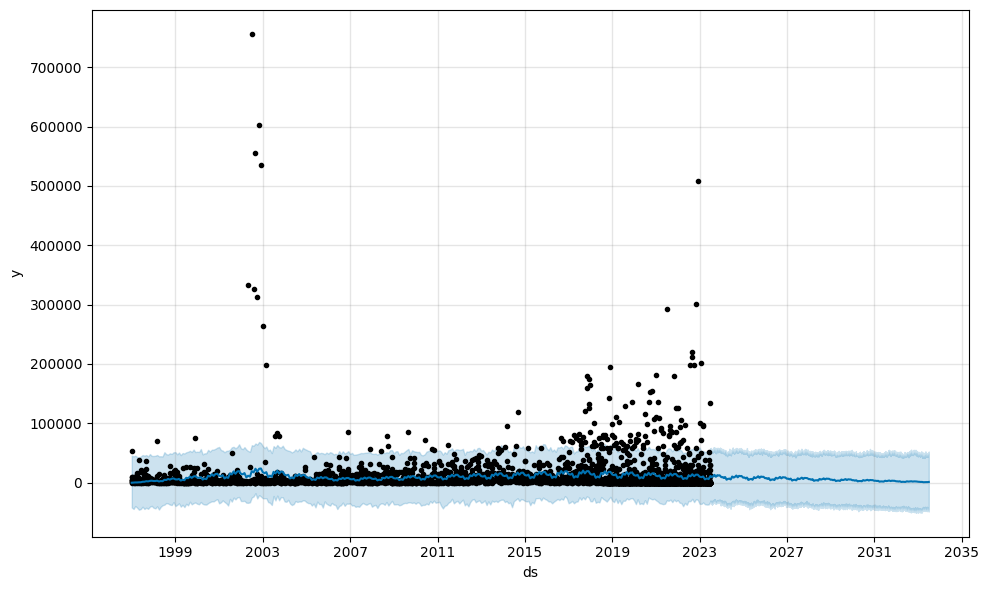

In [13]:
m = Prophet(seasonality_mode='multiplicative').fit(df)
future = m.make_future_dataframe(periods=3652) # ~ 10 anos
fcst = m.predict(future)
fig = m.plot(fcst)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj0n4t51j/9rpd9g01.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj0n4t51j/g2ij1_y3.json
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
01:24:15 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=91787', 'data', 'file=/tmp/tmpj0n4t51j/9rpd9g01.json', 'init=/tmp/tmpj0n4t51j/g2ij1_y3.json', 'output', 'file=/tmp/tmpj0n4t51j/prophet_modelk4q6k9hd/prophet_model-20230831012415_2.csv', 'me

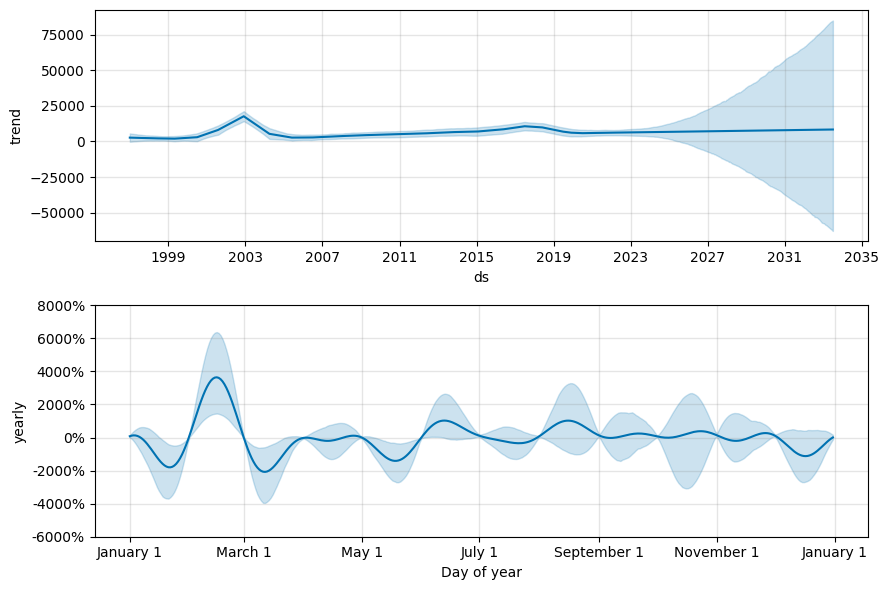

In [26]:
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=300).fit(df, show_progress=False)
fcst = m.predict(future)
fig = m.plot_components(fcst)

In [27]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


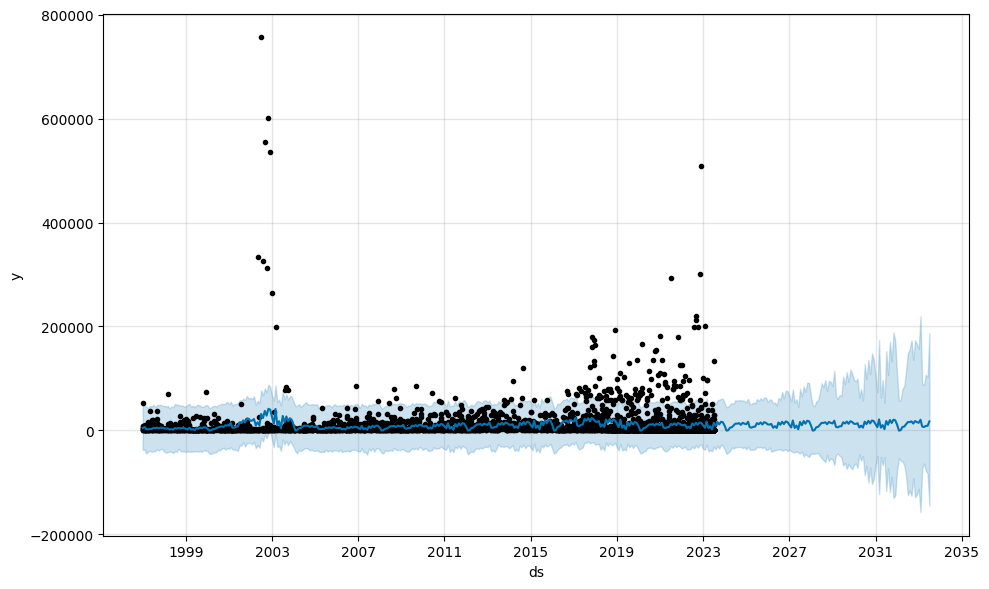

In [28]:
future = m.make_future_dataframe(periods=120, freq='MS')
fcst = m.predict(future)
fig = m.plot(fcst)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj0n4t51j/g5ikkpvh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj0n4t51j/s5u7l9k2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60852', 'data', 'file=/tmp/tmpj0n4t51j/g5ikkpvh.json', 'init=/tmp/tmpj0n4t51j/s5u7l9k2.json', 'output', 'file=/tmp/tmpj0n4t51j/prophet_model6iq3944h/prophet_model-20230831013420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:34:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:34:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


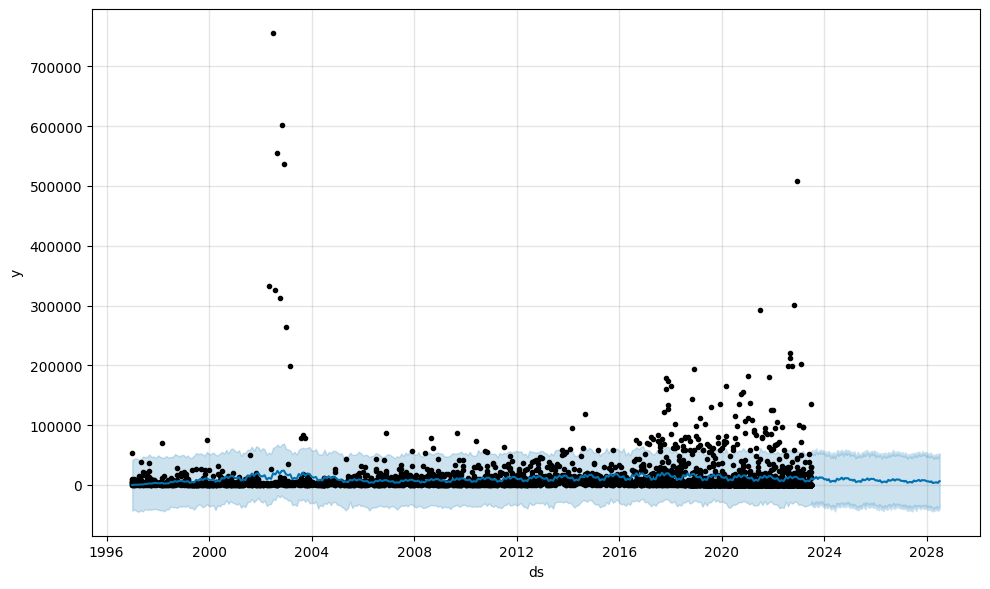

In [29]:
m = Prophet(seasonality_mode='multiplicative').fit(df)
future = m.make_future_dataframe(periods=1826) # ~ 5 anos
fcst = m.predict(future)
fig = m.plot(fcst)

# Ajustando o Prophet

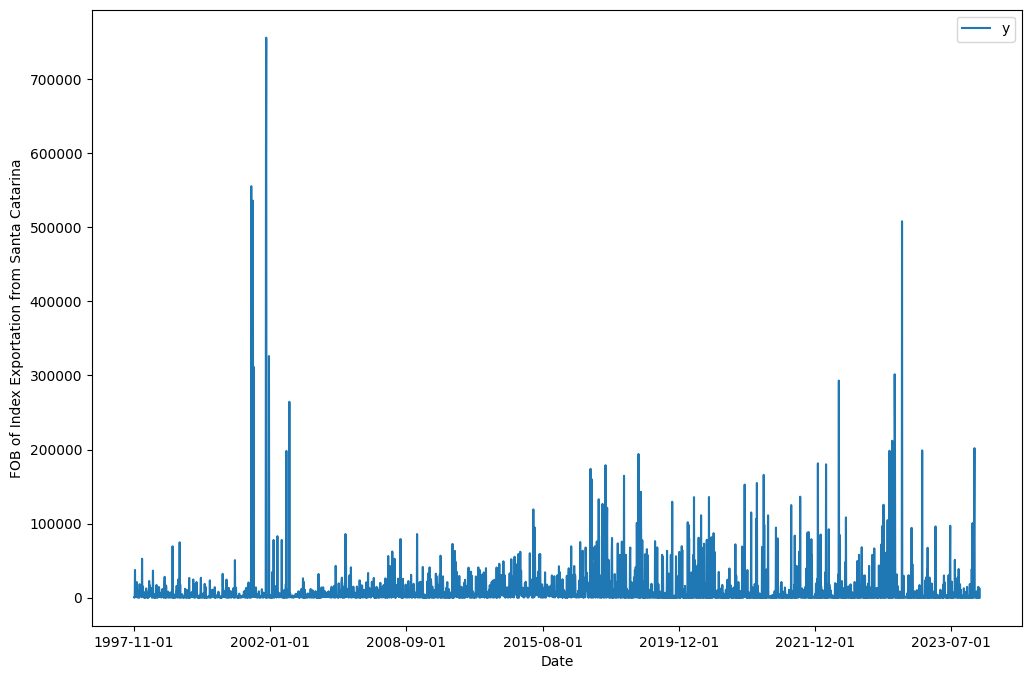

In [36]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('FOB of Index Exportation from Santa Catarina')
ax.set_xlabel('Date')

plt.show()

In [17]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
m = Prophet(interval_width=0.95)

In [18]:
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpru49pk5j/1opyenbb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpru49pk5j/vuemf7qq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85136', 'data', 'file=/tmp/tmpru49pk5j/1opyenbb.json', 'init=/tmp/tmpru49pk5j/vuemf7qq.json', 'output', 'file=/tmp/tmpru49pk5j/prophet_modelk3_orrfb/prophet_model-20230831014851.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:48:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:48:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [19]:
future_dates = m.make_future_dataframe(periods=36, freq='MS')
future_dates.head()

,ds
0,1997-01-01
1,1997-02-01
2,1997-03-01
3,1997-04-01
4,1997-05-01


In [20]:
forecast = m.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1997-01-01,3149.128663,-62025.440104,68119.874955
1,1997-02-01,778.591081,-72531.859380,64424.924052
2,1997-03-01,77.091594,-65541.379606,70228.586208
3,1997-04-01,-2886.904930,-65912.028318,65773.135874
4,1997-05-01,-1328.591381,-65888.250895,64352.740446


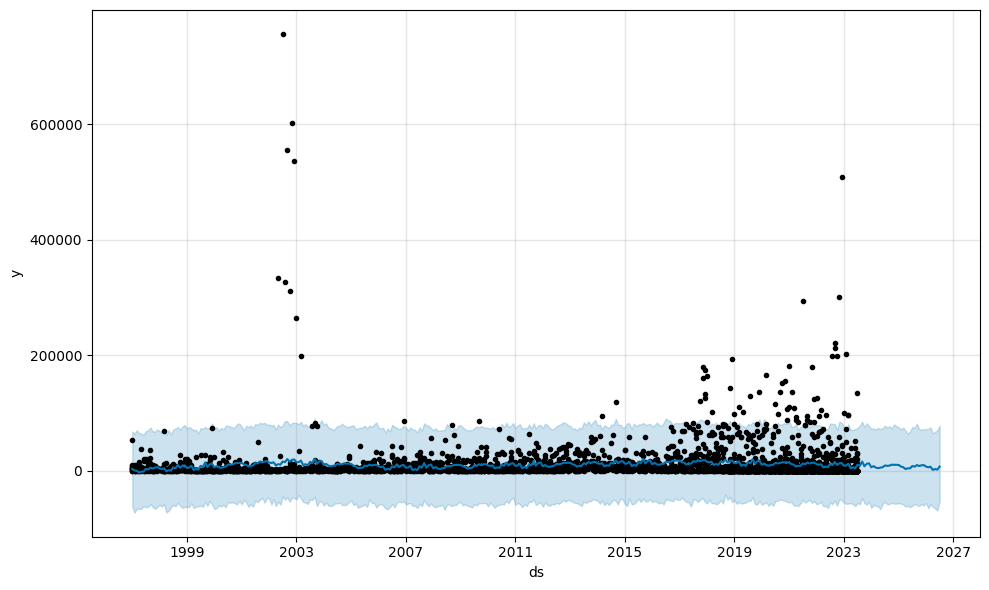

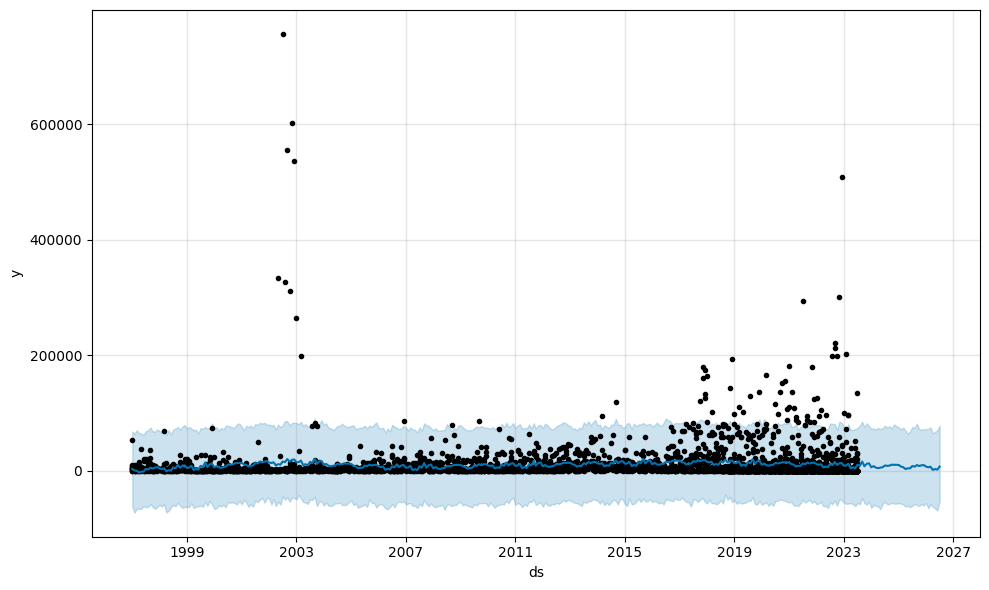

In [21]:
m.plot(forecast, uncertainty=True)

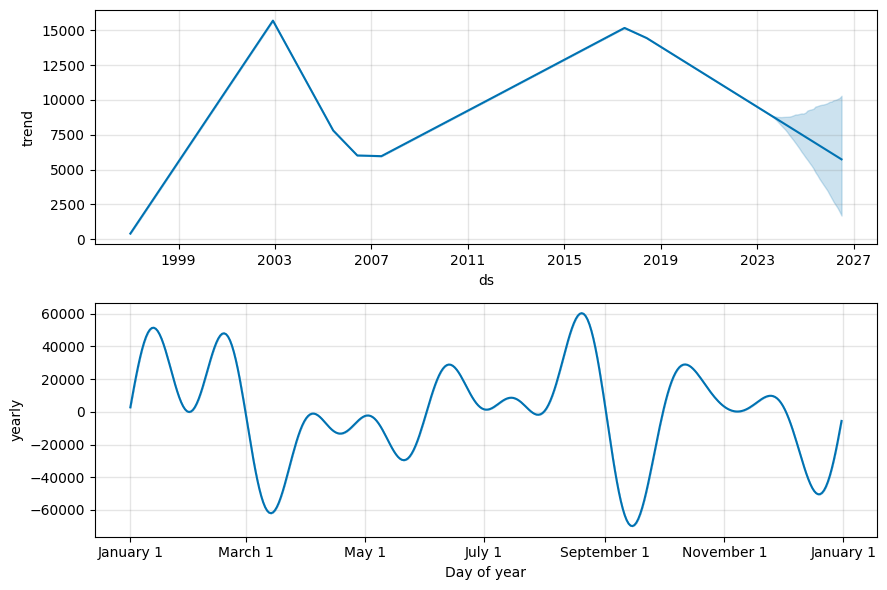

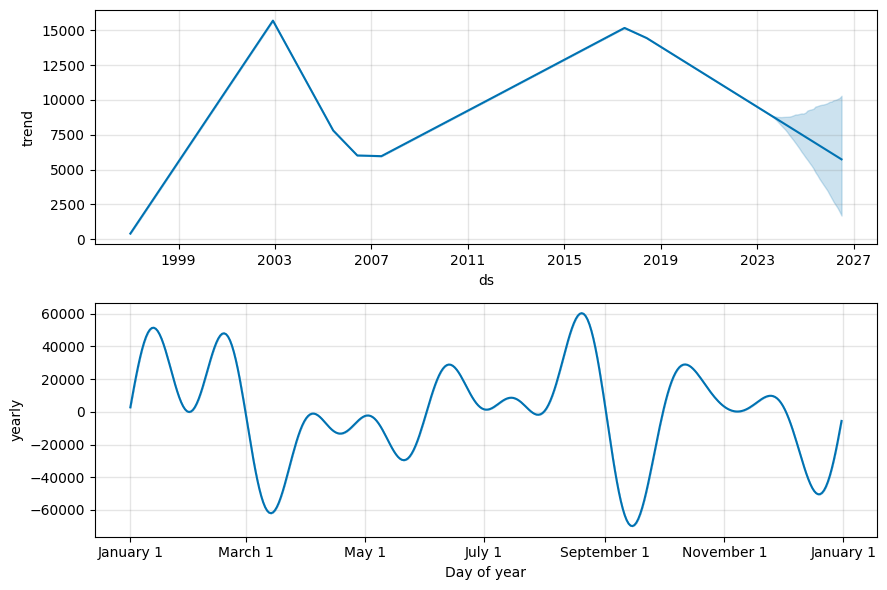

In [25]:
# components
m.plot_components(forecast)

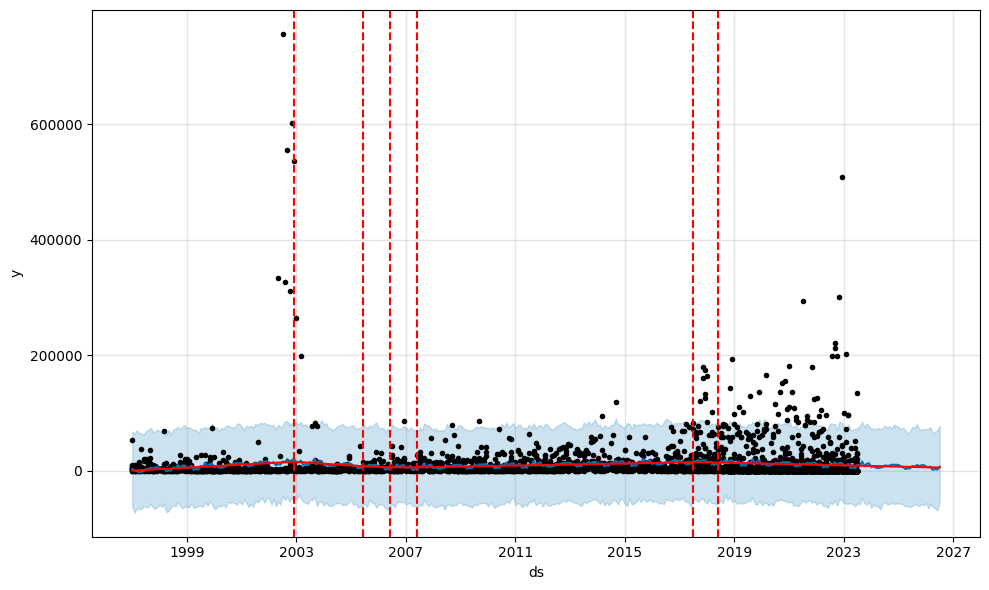

In [27]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)


In [32]:
ds_changePoints = m.changepoints
